# ImageConvolution
## Gráficos para o trabalho de implementação de programação concoorrente

### Importando dados

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [134]:
# Load the data
data_py = pd.read_csv('results.csv')
data_c = pd.read_csv('results_c.csv')

In [135]:
data_py.head()

,Unnamed: 0,Sequential,Pool,Block,Numba,Thread Number,Image Size
0,0,0.79774,1.262953,1.306445,0.581838,1,"(500, 500, 1)"
1,1,0.79774,0.869792,0.892388,0.001976,2,"(500, 500, 1)"
2,2,0.79774,0.777236,0.781924,0.001146,4,"(500, 500, 1)"
3,3,0.79774,1.062468,0.956316,0.001006,8,"(500, 500, 1)"
4,4,3.22611,4.471128,4.545652,0.014414,1,"(1000, 1000, 1)"


In [136]:
data_c.head()

,Unnamed: 0,C,Thread Number,Image Size
0,0,0.9131,1,performance_True_5000_5000_0.bin
1,1,0.4514,2,performance_True_5000_5000_0.bin
2,2,0.2341,4,performance_True_5000_5000_0.bin
3,3,0.1899,8,performance_True_5000_5000_0.bin
4,4,0.0091,1,performance_True_500_500_0.bin


In [137]:
# Remove the first colunm (index)
data_py = data_py.drop(columns=['Unnamed: 0'])
data_c = data_c.drop(columns=['Unnamed: 0'])

In [138]:
data_c.head()

,C,Thread Number,Image Size
0,0.9131,1,performance_True_5000_5000_0.bin
1,0.4514,2,performance_True_5000_5000_0.bin
2,0.2341,4,performance_True_5000_5000_0.bin
3,0.1899,8,performance_True_5000_5000_0.bin
4,0.0091,1,performance_True_500_500_0.bin


## Python

### Modificando dados

In [139]:
# Dividindo para cada Image Size
data_py_500 = data_py[data_py['Image Size'] == '(500, 500, 1)'].drop(columns=['Image Size']).sort_values(by='Thread Number')
data_py_1000 = data_py[data_py['Image Size'] == '(1000, 1000, 1)'].drop(columns=['Image Size']).sort_values(by='Thread Number')
data_py_5000 = data_py[data_py['Image Size'] == '(5000, 5000, 1)'].drop(columns=['Image Size']).sort_values(by='Thread Number')


In [140]:
data_py_5000

,Sequential,Pool,Block,Numba,Thread Number
8,81.753361,119.835461,111.202804,0.363678,1
56,80.770882,118.090556,109.241394,0.357383,1
20,80.736287,119.464894,109.272870,0.357961,1
44,80.699737,119.515954,109.375790,0.358560,1
32,80.970591,118.092129,109.189272,0.359539,1
57,80.770882,63.367468,61.769924,0.182713,2
45,80.699737,64.055202,55.945095,0.182541,2
33,80.970591,63.782085,55.776861,0.182454,2
21,80.736287,62.427505,55.898135,0.182357,2
9,81.753361,66.450556,56.651235,0.186281,2


In [141]:
# Para cada data frame, vamos calcular a média e o desvio padrão e colocar em um novo data frame
data_py_500_mean = data_py_500.groupby('Thread Number').mean().reset_index()
data_py_500_std = data_py_500.groupby('Thread Number').std().reset_index()

data_py_1000_mean = data_py_1000.groupby('Thread Number').mean().reset_index()
data_py_1000_std = data_py_1000.groupby('Thread Number').std().reset_index()

data_py_5000_mean = data_py_5000.groupby('Thread Number').mean().reset_index()
data_py_5000_std = data_py_5000.groupby('Thread Number').std().reset_index()

In [142]:
data_py_500_mean

,Thread Number,Sequential,Pool,Block,Numba
0,1,0.816424,1.250006,1.300684,0.119597
1,2,0.816424,0.885455,0.914594,0.002279
2,4,0.816424,0.853971,0.820191,0.001579
3,8,0.816424,1.081365,1.008667,0.001203


### Plotando gráficos

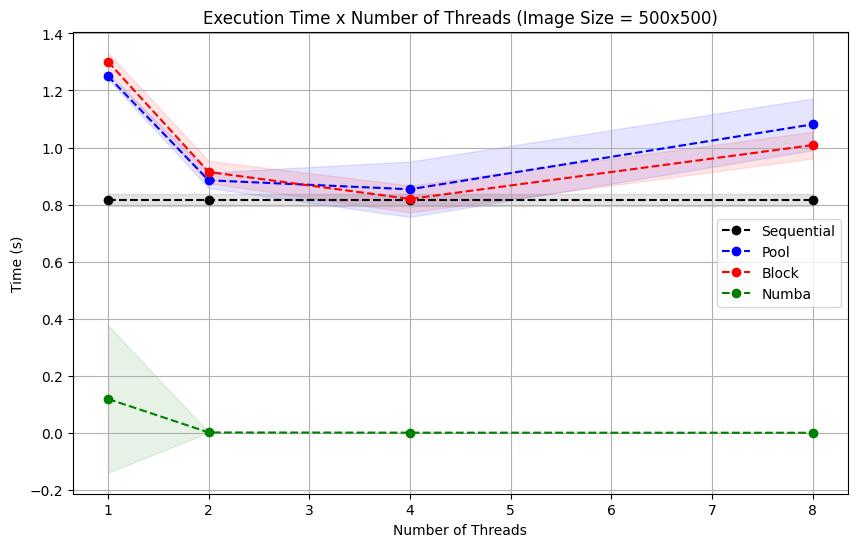

In [143]:
#Plotando os gráficos para Python
alpha = 0.1

plt.figure(figsize=(10, 6))
plt.plot(data_py_500_mean['Thread Number'], data_py_500_mean['Sequential'], marker='o', label='Sequential', color='black', linestyle='dashed')
plt.fill_between(data_py_500_mean['Thread Number'], data_py_500_mean['Sequential'] - data_py_500_std['Sequential'], data_py_500_mean['Sequential'] + data_py_500_std['Sequential'], color='black', alpha=alpha)

plt.plot(data_py_500_mean['Thread Number'], data_py_500_mean['Pool'], marker='o', label='Pool', color='blue', linestyle='dashed')
plt.fill_between(data_py_500_mean['Thread Number'], data_py_500_mean['Pool'] - data_py_500_std['Pool'], data_py_500_mean['Pool'] + data_py_500_std['Pool'], color='blue', alpha=alpha)

plt.plot(data_py_500_mean['Thread Number'], data_py_500_mean['Block'], marker='o', label='Block', color='red', linestyle='dashed')
plt.fill_between(data_py_500_mean['Thread Number'], data_py_500_mean['Block'] - data_py_500_std['Block'], data_py_500_mean['Block'] + data_py_500_std['Block'], color='red', alpha=alpha)

plt.plot(data_py_500_mean['Thread Number'], data_py_500_mean['Numba'], marker='o', color='green', linestyle='dashed', label='Numba')
plt.fill_between(data_py_500_mean['Thread Number'], data_py_500_mean['Numba'] - data_py_500_std['Numba'], data_py_500_mean['Numba'] + data_py_500_std['Numba'], color='green', alpha=alpha)

plt.xlabel('Number of Threads')
plt.ylabel('Time (s)')
plt.title('Execution Time x Number of Threads (Image Size = 500x500)')
plt.legend()
plt.grid()
plt.show()


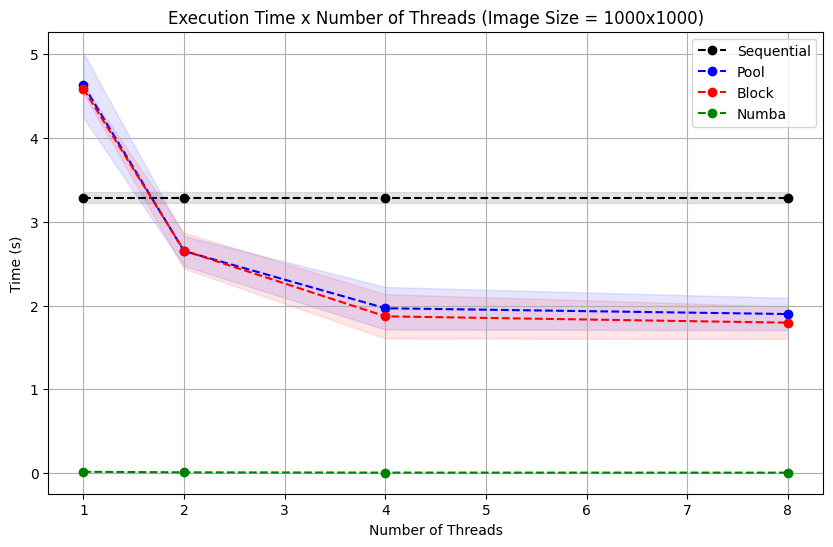

In [144]:
# 1000x1000
plt.figure(figsize=(10, 6))
plt.plot(data_py_1000_mean['Thread Number'], data_py_1000_mean['Sequential'], marker='o', label='Sequential', color='black', linestyle='dashed')
plt.fill_between(data_py_1000_mean['Thread Number'], data_py_1000_mean['Sequential'] - data_py_1000_std['Sequential'], data_py_1000_mean['Sequential'] + data_py_1000_std['Sequential'], color='black', alpha=alpha)

plt.plot(data_py_1000_mean['Thread Number'], data_py_1000_mean['Pool'], marker='o', label='Pool', color='blue', linestyle='dashed')
plt.fill_between(data_py_1000_mean['Thread Number'], data_py_1000_mean['Pool'] - data_py_1000_std['Pool'], data_py_1000_mean['Pool'] + data_py_1000_std['Pool'], color='blue', alpha=alpha)

plt.plot(data_py_1000_mean['Thread Number'], data_py_1000_mean['Block'], marker='o', label='Block', color='red', linestyle='dashed')
plt.fill_between(data_py_1000_mean['Thread Number'], data_py_1000_mean['Block'] - data_py_1000_std['Block'], data_py_1000_mean['Block'] + data_py_1000_std['Block'], color='red', alpha=alpha)

plt.plot(data_py_1000_mean['Thread Number'], data_py_1000_mean['Numba'], marker='o', color='green', linestyle='dashed', label='Numba')
plt.fill_between(data_py_1000_mean['Thread Number'], data_py_1000_mean['Numba'] - data_py_1000_std['Numba'], data_py_1000_mean['Numba'] + data_py_1000_std['Numba'], color='green', alpha=alpha)

plt.xlabel('Number of Threads')
plt.ylabel('Time (s)')

plt.title('Execution Time x Number of Threads (Image Size = 1000x1000)')
plt.legend()
plt.grid()
plt.show()

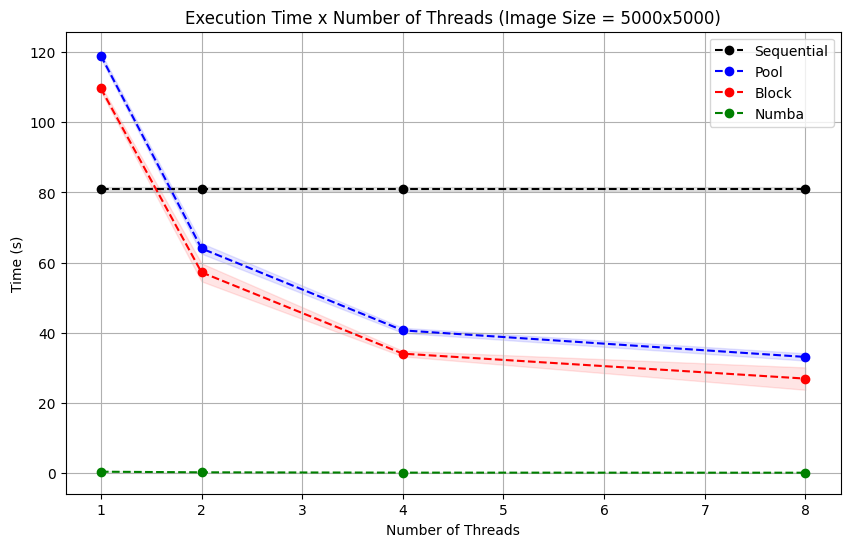

In [145]:
# 5000x5000
plt.figure(figsize=(10, 6))
plt.plot(data_py_5000_mean['Thread Number'], data_py_5000_mean['Sequential'], marker='o', label='Sequential', color='black', linestyle='dashed')
plt.fill_between(data_py_5000_mean['Thread Number'], data_py_5000_mean['Sequential'] - data_py_5000_std['Sequential'], data_py_5000_mean['Sequential'] + data_py_5000_std['Sequential'], color='black', alpha=alpha)

plt.plot(data_py_5000_mean['Thread Number'], data_py_5000_mean['Pool'], marker='o', label='Pool', color='blue', linestyle='dashed')
plt.fill_between(data_py_5000_mean['Thread Number'], data_py_5000_mean['Pool'] - data_py_5000_std['Pool'], data_py_5000_mean['Pool'] + data_py_5000_std['Pool'], color='blue', alpha=alpha)

plt.plot(data_py_5000_mean['Thread Number'], data_py_5000_mean['Block'], marker='o', label='Block', color='red', linestyle='dashed')
plt.fill_between(data_py_5000_mean['Thread Number'], data_py_5000_mean['Block'] - data_py_5000_std['Block'], data_py_5000_mean['Block'] + data_py_5000_std['Block'], color='red', alpha=alpha)

plt.plot(data_py_5000_mean['Thread Number'], data_py_5000_mean['Numba'], marker='o', color='green', linestyle='dashed', label='Numba')
plt.fill_between(data_py_5000_mean['Thread Number'], data_py_5000_mean['Numba'] - data_py_5000_std['Numba'], data_py_5000_mean['Numba'] + data_py_5000_std['Numba'], color='green', alpha=alpha)

plt.xlabel('Number of Threads')
plt.ylabel('Time (s)')
plt.title('Execution Time x Number of Threads (Image Size = 5000x5000)')
#plt.yscale('log')

plt.legend()
plt.grid()
plt.show()

#### Eficiencia e Aceleração

In [146]:
# Calculando a aceleração para cada caso 
data_py_500_ace = data_py_500_mean.copy()
data_py_500_ace['Sequential'] = data_py_500_mean['Sequential'] / data_py_500_mean['Sequential']
data_py_500_ace['Pool'] = data_py_500_mean['Sequential'] / data_py_500_mean['Pool']
data_py_500_ace['Block'] = data_py_500_mean['Sequential'] / data_py_500_mean['Block']
data_py_500_ace['Numba'] = data_py_500_mean['Sequential'] / data_py_500_mean['Numba']

data_py_1000_ace = data_py_1000_mean.copy()
data_py_1000_ace['Sequential'] = data_py_1000_mean['Sequential'] / data_py_1000_mean['Sequential']
data_py_1000_ace['Pool'] = data_py_1000_mean['Sequential'] / data_py_1000_mean['Pool']
data_py_1000_ace['Block'] = data_py_1000_mean['Sequential'] / data_py_1000_mean['Block']
data_py_1000_ace['Numba'] = data_py_1000_mean['Sequential'] / data_py_1000_mean['Numba']

data_py_5000_ace = data_py_5000_mean.copy()
data_py_5000_ace['Sequential'] = data_py_5000_mean['Sequential'] / data_py_5000_mean['Sequential']
data_py_5000_ace['Pool'] = data_py_5000_mean['Sequential'] / data_py_5000_mean['Pool']
data_py_5000_ace['Block'] = data_py_5000_mean['Sequential'] / data_py_5000_mean['Block']
data_py_5000_ace['Numba'] = data_py_5000_mean['Sequential'] / data_py_5000_mean['Numba']

# Calculando eficiencia

data_py_500_ef = data_py_500_mean.copy()
data_py_500_ef['Sequential'] = data_py_500_ace['Sequential'] / data_py_500_mean['Thread Number']
data_py_500_ef['Pool'] = data_py_500_ace['Pool'] / data_py_500_mean['Thread Number']
data_py_500_ef['Block'] = data_py_500_ace['Block'] / data_py_500_mean['Thread Number']
data_py_500_ef['Numba'] = data_py_500_ace['Numba'] / data_py_500_mean['Thread Number']


data_py_1000_ef = data_py_1000_mean.copy()
data_py_1000_ef['Sequential'] = data_py_1000_ace['Sequential'] / data_py_1000_mean['Thread Number']
data_py_1000_ef['Pool'] = data_py_1000_ace['Pool'] / data_py_1000_mean['Thread Number']
data_py_1000_ef['Block'] = data_py_1000_ace['Block'] / data_py_1000_mean['Thread Number']
data_py_1000_ef['Numba'] = data_py_1000_ace['Numba'] / data_py_1000_mean['Thread Number']

data_py_5000_ef = data_py_5000_mean.copy()
data_py_5000_ef['Sequential'] = data_py_5000_ace['Sequential'] / data_py_5000_mean['Thread Number']
data_py_5000_ef['Pool'] = data_py_5000_ace['Pool'] / data_py_5000_mean['Thread Number']
data_py_5000_ef['Block'] = data_py_5000_ace['Block'] / data_py_5000_mean['Thread Number']
data_py_5000_ef['Numba'] = data_py_5000_ace['Numba'] / data_py_5000_mean['Thread Number']


In [147]:
data_py_1000_ace

,Thread Number,Sequential,Pool,Block,Numba
0,1,1.0,0.709368,0.715864,226.514708
1,2,1.0,1.239538,1.237386,418.767276
2,4,1.0,1.670240,1.756202,695.831243
3,8,1.0,1.730985,1.830658,809.409824


In [148]:
data_py_500_ef

,Thread Number,Sequential,Pool,Block,Numba
0,1,1.000,0.653136,0.627688,6.826457
1,2,0.500,0.461020,0.446331,179.115535
2,4,0.250,0.239008,0.248852,129.298097
3,8,0.125,0.094374,0.101176,84.800965


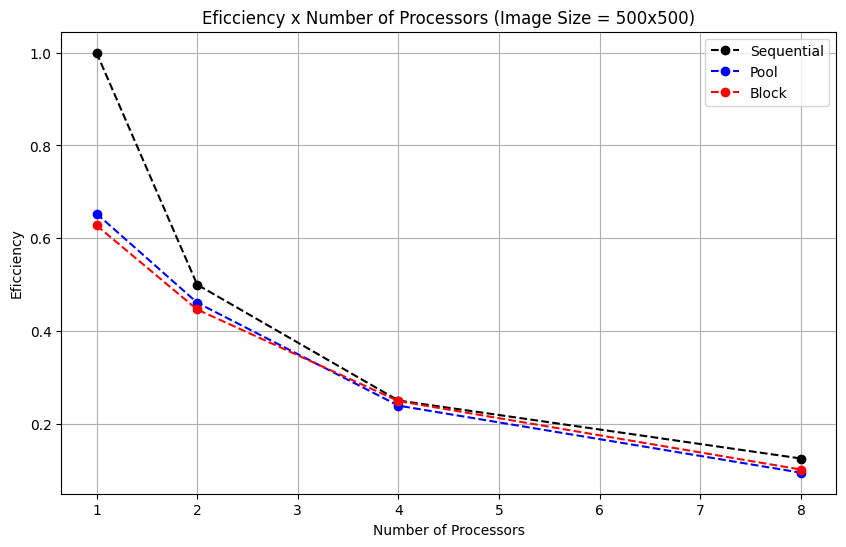

In [149]:
# Plotando a eficiencia
plt.figure(figsize=(10, 6))
plt.plot(data_py_500_ef['Thread Number'], data_py_500_ef['Sequential'], marker='o', label='Sequential', color='black', linestyle='dashed')
plt.plot(data_py_500_ef['Thread Number'], data_py_500_ef['Pool'], marker='o', label='Pool', color='blue', linestyle='dashed')
plt.plot(data_py_500_ef['Thread Number'], data_py_500_ef['Block'], marker='o', label='Block', color='red', linestyle='dashed')
# plt.plot(data_py_500_ef['Thread Number'], data_py_500_ef['Numba'], marker='o', label='Numba', color='green', linestyle='dashed')


plt.xlabel('Number of Processors')
plt.ylabel('Eficciency')
plt.title('Eficciency x Number of Processors (Image Size = 500x500)')

# plt.yscale('log')
plt.legend()
plt.grid()
plt.show()


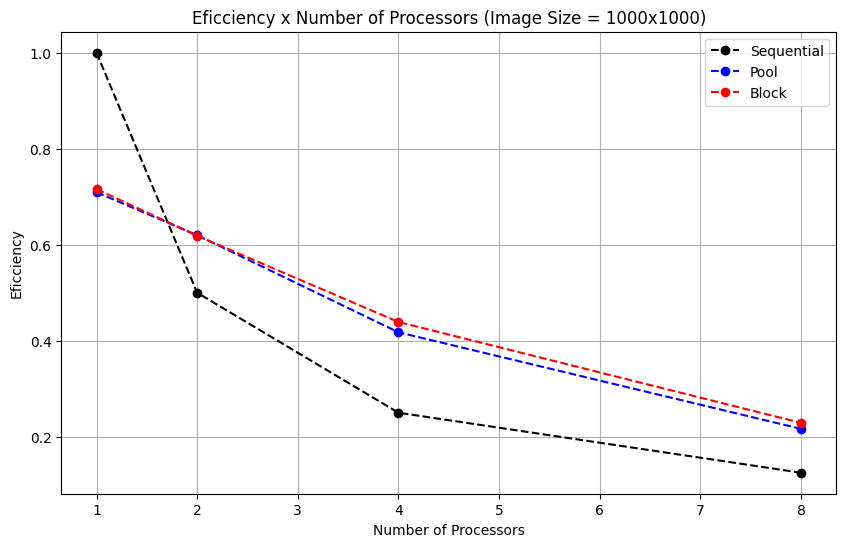

In [150]:
# 1000x1000
plt.figure(figsize=(10, 6))
plt.plot(data_py_1000_ef['Thread Number'], data_py_1000_ef['Sequential'], marker='o', label='Sequential', color='black', linestyle='dashed')
plt.plot(data_py_1000_ef['Thread Number'], data_py_1000_ef['Pool'], marker='o', label='Pool', color='blue', linestyle='dashed')
plt.plot(data_py_1000_ef['Thread Number'], data_py_1000_ef['Block'], marker='o', label='Block', color='red', linestyle='dashed')
# plt.plot(data_py_1000_ef['Thread Number'], data_py_1000_ef['Numba'], marker='o', label='Numba', color='green', linestyle='dashed')


plt.xlabel('Number of Processors')
plt.ylabel('Eficciency')
plt.title('Eficciency x Number of Processors (Image Size = 1000x1000)')

# plt.yscale('log')
plt.legend()
plt.grid()
plt.show()

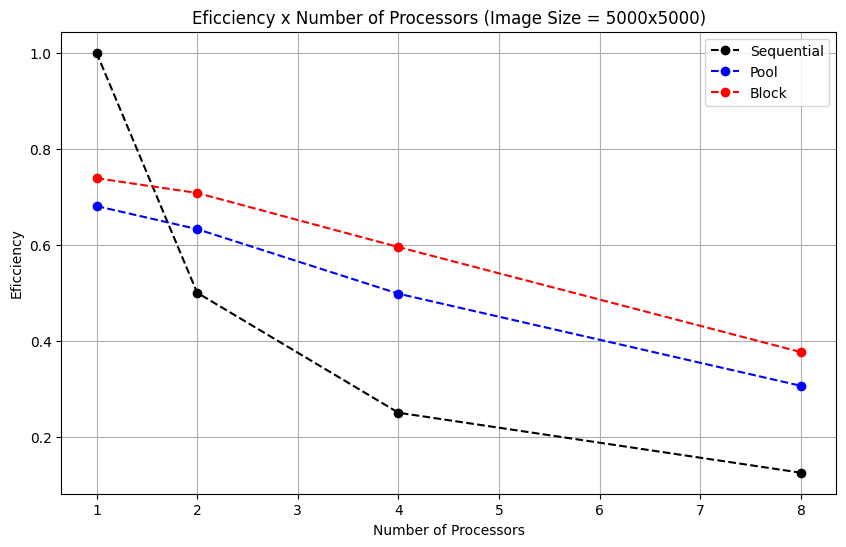

In [152]:
# 5000x5000
plt.figure(figsize=(10, 6))

plt.plot(data_py_5000_ef['Thread Number'], data_py_5000_ef['Sequential'], marker='o', label='Sequential', color='black', linestyle='dashed')
plt.plot(data_py_5000_ef['Thread Number'], data_py_5000_ef['Pool'], marker='o', label='Pool', color='blue', linestyle='dashed')
plt.plot(data_py_5000_ef['Thread Number'], data_py_5000_ef['Block'], marker='o', label='Block', color='red', linestyle='dashed')
# plt.plot(data_py_5000_ef['Thread Number'], data_py_5000_ef['Numba'], marker='o', label='Numba', color='green', linestyle='dashed')


plt.xlabel('Number of Processors')
plt.ylabel('Eficciency')
plt.title('Eficciency x Number of Processors (Image Size = 5000x5000)')

# plt.yscale('log')
plt.legend()
plt.grid()
plt.show()


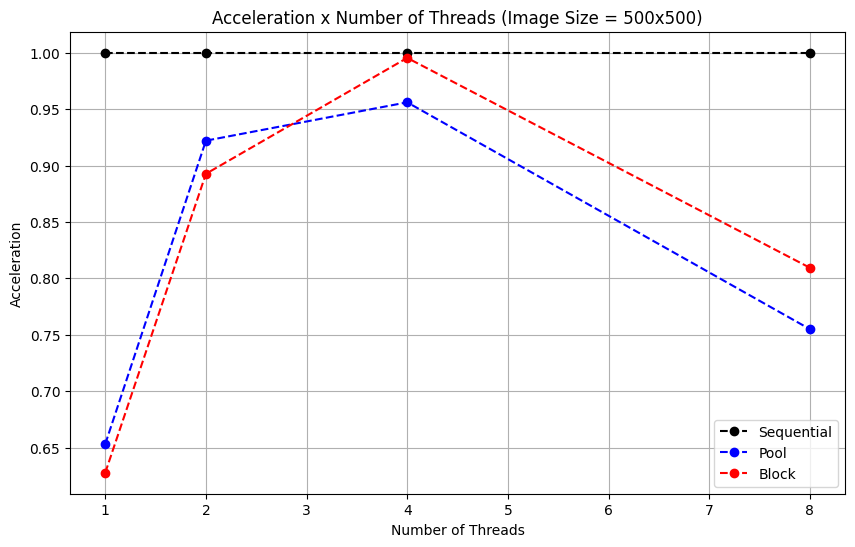

In [153]:
# Mostrando Aceleração
plt.figure(figsize=(10, 6))
plt.plot(data_py_500_ace['Thread Number'], data_py_500_ace['Sequential'], marker='o', label='Sequential', color='black', linestyle='dashed')
plt.plot(data_py_500_ace['Thread Number'], data_py_500_ace['Pool'], marker='o', label='Pool', color='blue', linestyle='dashed')
plt.plot(data_py_500_ace['Thread Number'], data_py_500_ace['Block'], marker='o', label='Block', color='red', linestyle='dashed')
#plt.plot(data_py_500_ace['Thread Number'], data_py_500_ace['Numba'], marker='o', label='Numba', color='green', linestyle='dashed')

plt.xlabel('Number of Threads')
plt.ylabel('Acceleration')
plt.title('Acceleration x Number of Threads (Image Size = 500x500)')
plt.legend()
plt.grid()
plt.show()

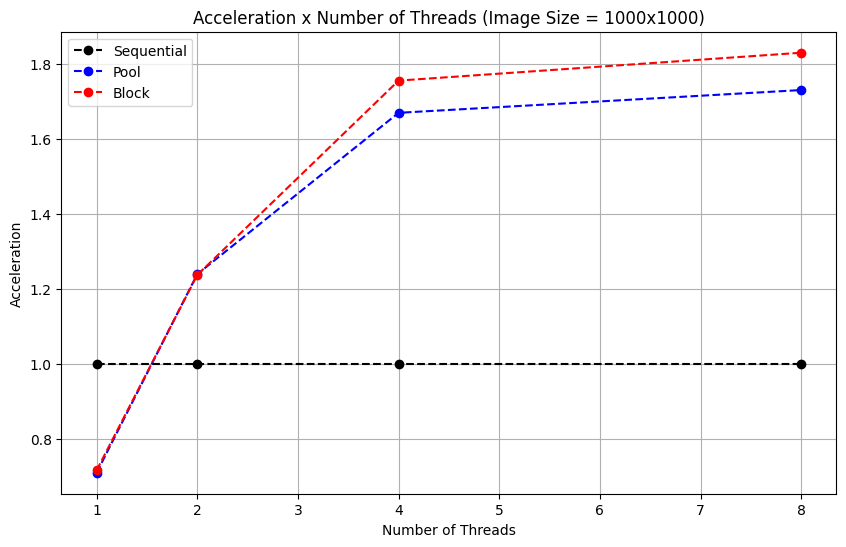

In [154]:
# 1000x1000
plt.figure(figsize=(10, 6))
plt.plot(data_py_1000_ace['Thread Number'], data_py_1000_ace['Sequential'], marker='o', label='Sequential', color='black', linestyle='dashed')
plt.plot(data_py_1000_ace['Thread Number'], data_py_1000_ace['Pool'], marker='o', label='Pool', color='blue', linestyle='dashed')
plt.plot(data_py_1000_ace['Thread Number'], data_py_1000_ace['Block'], marker='o', label='Block', color='red', linestyle='dashed')
#plt.plot(data_py_1000_ace['Thread Number'], data_py_1000_ace['Numba'], marker='o', label='Numba', color='green', linestyle='dashed')

plt.xlabel('Number of Threads')
plt.ylabel('Acceleration')
plt.title('Acceleration x Number of Threads (Image Size = 1000x1000)')
plt.legend()
plt.grid()
plt.show()


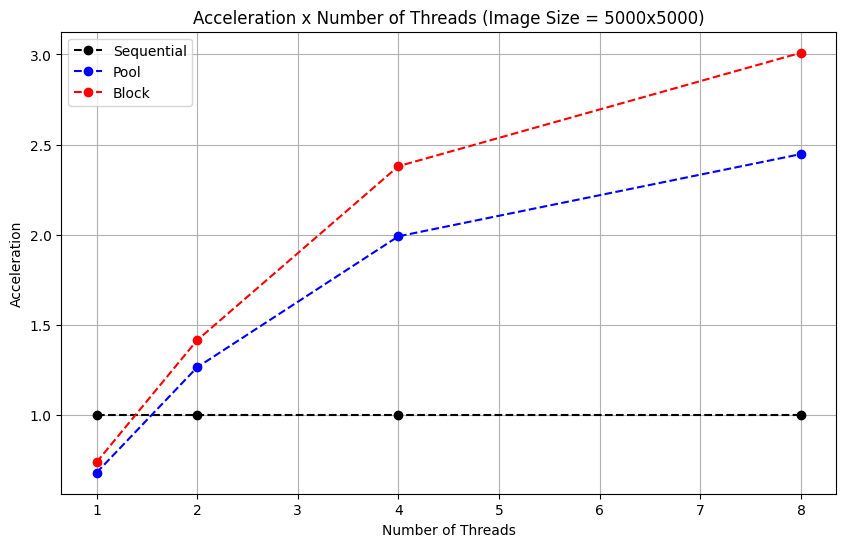

In [155]:
# 5000x5000
plt.figure(figsize=(10, 6))
plt.plot(data_py_5000_ace['Thread Number'], data_py_5000_ace['Sequential'], marker='o', label='Sequential', color='black', linestyle='dashed')
plt.plot(data_py_5000_ace['Thread Number'], data_py_5000_ace['Pool'], marker='o', label='Pool', color='blue', linestyle='dashed')
plt.plot(data_py_5000_ace['Thread Number'], data_py_5000_ace['Block'], marker='o', label='Block', color='red', linestyle='dashed')
#plt.plot(data_py_5000_ace['Thread Number'], data_py_5000_ace['Numba'], marker='o', label='Numba', color='green', linestyle='dashed')

plt.xlabel('Number of Threads')
plt.ylabel('Acceleration')
plt.title('Acceleration x Number of Threads (Image Size = 5000x5000)')
plt.legend()
plt.grid()
plt.show()

## C

### Modificando dados

In [156]:
# divindo para cada Image Size
data_c_500 = data_c[data_c['Image Size'] == 'performance_True_500_500_0.bin'].drop(columns=['Image Size']).sort_values(by='Thread Number')
data_c_1000 = data_c[data_c['Image Size'] == 'performance_True_1000_1000_0.bin'].drop(columns=['Image Size']).sort_values(by='Thread Number')
data_c_5000 = data_c[data_c['Image Size'] == 'performance_True_5000_5000_0.bin'].drop(columns=['Image Size']).sort_values(by='Thread Number')

data_c_500

,C,Thread Number
4,0.0091,1
52,0.0093,1
16,0.0092,1
40,0.0093,1
28,0.0093,1
53,0.0047,2
41,0.0047,2
29,0.0047,2
17,0.0047,2
5,0.0046,2


In [157]:
# Para cada data frame, vamos calcular a média e o desvio padrão e colocar em um novo data frame
data_c_500_mean = data_c_500.groupby('Thread Number').mean().reset_index()
data_c_500_std = data_c_500.groupby('Thread Number').std().reset_index()
data_c_1000_mean = data_c_1000.groupby('Thread Number').mean().reset_index()
data_c_1000_std = data_c_1000.groupby('Thread Number').std().reset_index()
data_c_5000_mean = data_c_5000.groupby('Thread Number').mean().reset_index()
data_c_5000_std = data_c_5000.groupby('Thread Number').std().reset_index()

data_c_500_mean

,Thread Number,C
0,1,0.00924
1,2,0.00468
2,4,0.00246
3,8,0.00242


### Plotando gráficos

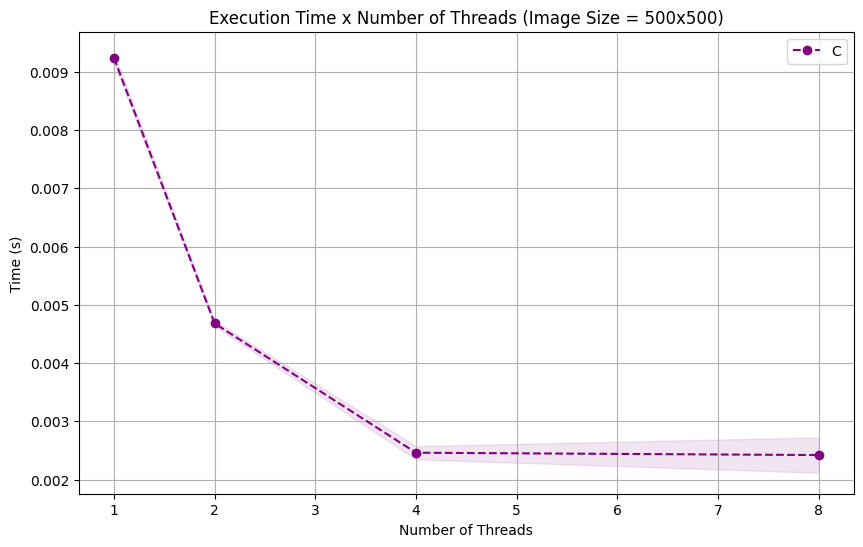

In [160]:
# Plotando os gráficos para C
alpha = 0.1

plt.figure(figsize=(10, 6))
plt.plot(data_c_500_mean['Thread Number'], data_c_500_mean['C'], marker='o', label='C', color='purple', linestyle='dashed')
plt.fill_between(data_c_500_mean['Thread Number'], data_c_500_mean['C'] - data_c_500_std['C'], data_c_500_mean['C'] + data_c_500_std['C'], color='purple', alpha=alpha)

plt.xlabel('Number of Threads')
plt.ylabel('Time (s)')


plt.title('Execution Time x Number of Threads (Image Size = 500x500)')
plt.legend()
plt.grid()
plt.show()

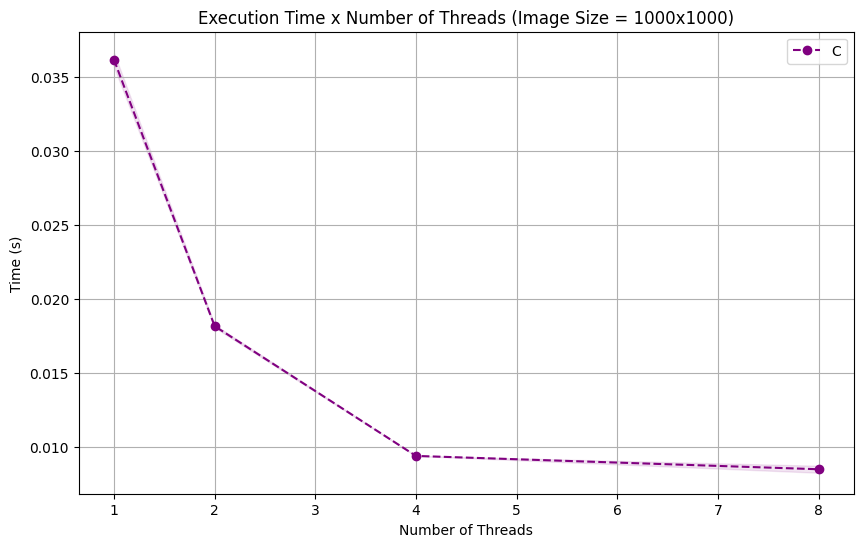

In [161]:
# 1000x1000
plt.figure(figsize=(10, 6))
plt.plot(data_c_1000_mean['Thread Number'], data_c_1000_mean['C'], marker='o', label='C', color='purple', linestyle='dashed')
plt.fill_between(data_c_1000_mean['Thread Number'], data_c_1000_mean['C'] - data_c_1000_std['C'], data_c_1000_mean['C'] + data_c_1000_std['C'], color='purple', alpha=alpha)

plt.xlabel('Number of Threads')
plt.ylabel('Time (s)')
plt.title('Execution Time x Number of Threads (Image Size = 1000x1000)')
plt.legend()
plt.grid()

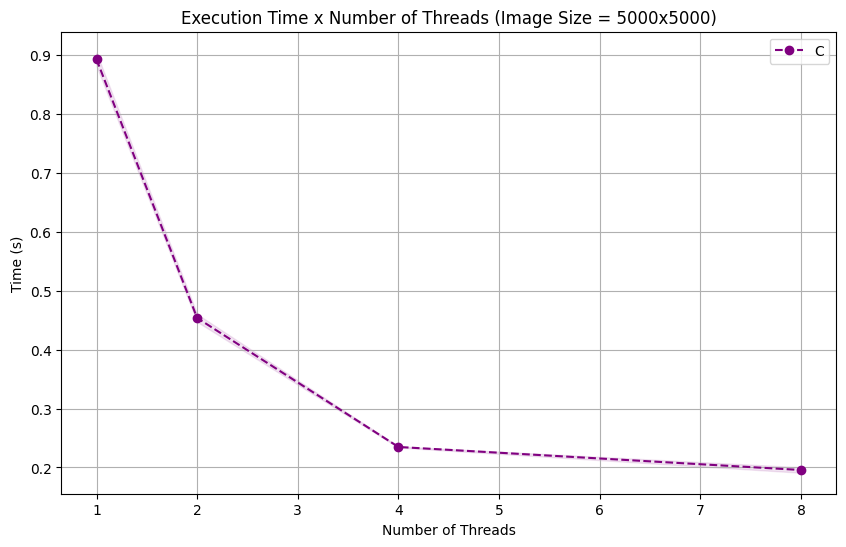

In [162]:
# 5000x5000
plt.figure(figsize=(10, 6))
plt.plot(data_c_5000_mean['Thread Number'], data_c_5000_mean['C'], marker='o', label='C', color='purple', linestyle='dashed')
plt.fill_between(data_c_5000_mean['Thread Number'], data_c_5000_mean['C'] - data_c_5000_std['C'], data_c_5000_mean['C'] + data_c_5000_std['C'], color='purple', alpha=alpha)

plt.xlabel('Number of Threads')
plt.ylabel('Time (s)')
plt.title('Execution Time x Number of Threads (Image Size = 5000x5000)')
plt.legend()
plt.grid()
plt.show()

#### Eficiencia e Aceleração

In [167]:
# Calculando a aceleração para cada caso
data_c_500_ace = data_c_500_mean.copy()
data_c_500_ace['C'] = data_c_500_mean['C'][0] / data_c_500_mean['C']
data_c_1000_ace = data_c_1000_mean.copy()
data_c_1000_ace['C'] = data_c_1000_mean['C'][0] / data_c_1000_mean['C']
data_c_5000_ace = data_c_5000_mean.copy()
data_c_5000_ace['C'] = data_c_5000_mean['C'][0] / data_c_5000_mean['C']

data_c_500_ace

,Thread Number,C
0,1,1.000000
1,2,1.974359
2,4,3.756098
3,8,3.818182


In [168]:
# Calculando a eficiencia

data_c_500_ef = data_c_500_mean.copy()
data_c_500_ef['C'] = data_c_500_ace['C'] / data_c_500_mean['Thread Number']
data_c_1000_ef = data_c_1000_mean.copy()
data_c_1000_ef['C'] = data_c_1000_ace['C'] / data_c_1000_mean['Thread Number']
data_c_5000_ef = data_c_5000_mean.copy()
data_c_5000_ef['C'] = data_c_5000_ace['C'] / data_c_5000_mean['Thread Number']

data_c_500_ef

,Thread Number,C
0,1,1.000000
1,2,0.987179
2,4,0.939024
3,8,0.477273


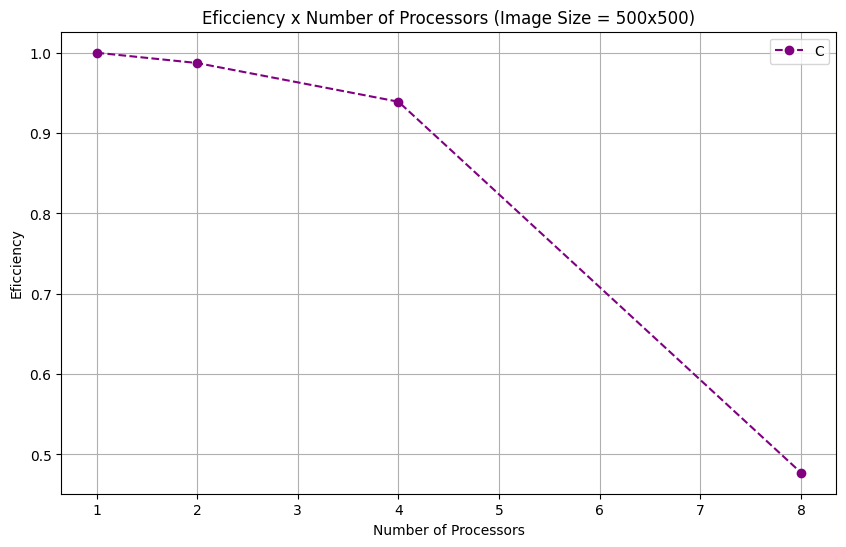

In [169]:
# Plotando a eficiencia
plt.figure(figsize=(10, 6))
plt.plot(data_c_500_ef['Thread Number'], data_c_500_ef['C'], marker='o', label='C', color='purple', linestyle='dashed')

plt.xlabel('Number of Processors')
plt.ylabel('Eficciency')
plt.title('Eficciency x Number of Processors (Image Size = 500x500)')
plt.legend()
plt.grid()
plt.show()

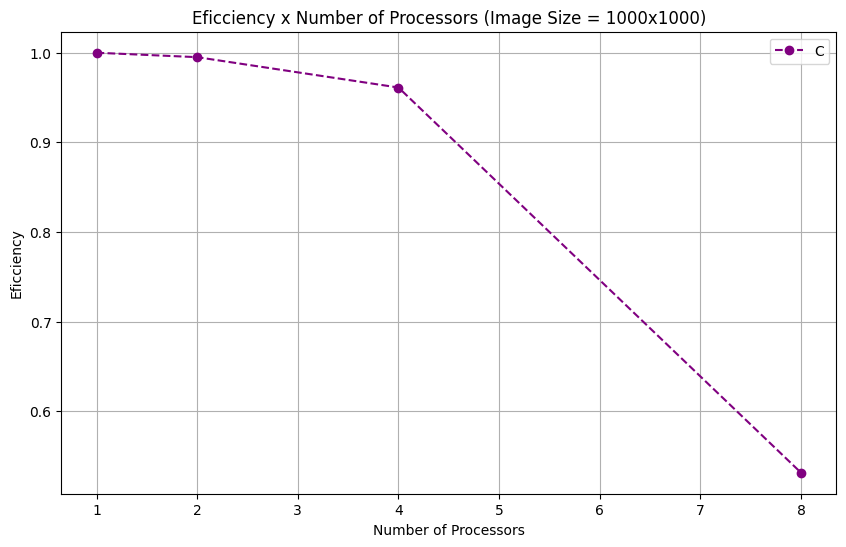

In [170]:
# 1000x1000
plt.figure(figsize=(10, 6))
plt.plot(data_c_1000_ef['Thread Number'], data_c_1000_ef['C'], marker='o', label='C', color='purple', linestyle='dashed')


plt.xlabel('Number of Processors')
plt.ylabel('Eficciency')
plt.title('Eficciency x Number of Processors (Image Size = 1000x1000)')
plt.legend()
plt.grid()
plt.show()

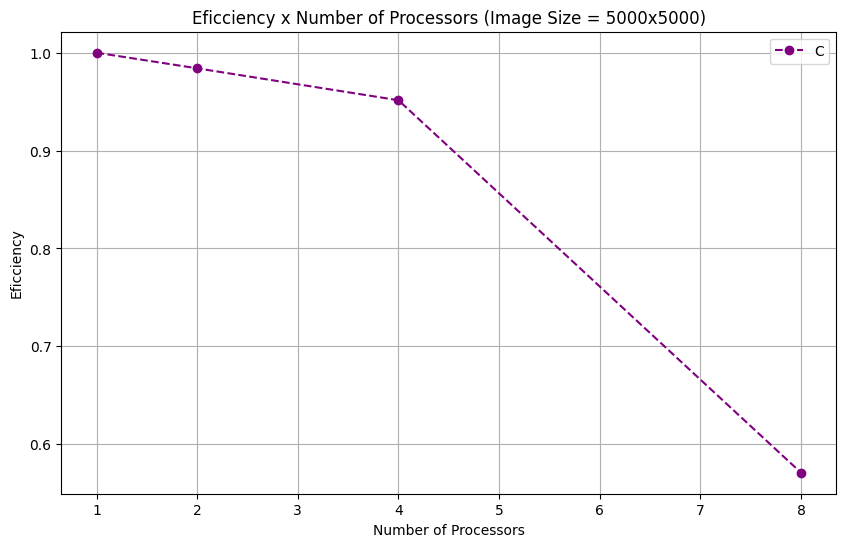

In [171]:
# 5000x5000
plt.figure(figsize=(10, 6))
plt.plot(data_c_5000_ef['Thread Number'], data_c_5000_ef['C'], marker='o', label='C', color='purple', linestyle='dashed')

plt.xlabel('Number of Processors')
plt.ylabel('Eficciency')
plt.title('Eficciency x Number of Processors (Image Size = 5000x5000)')
plt.legend()
plt.grid()
plt.show()

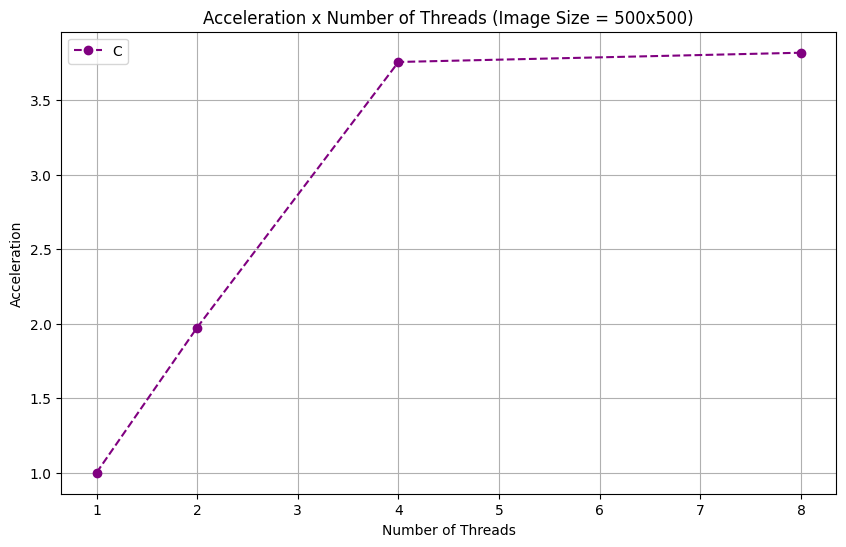

In [172]:
# Mostrando Aceleração
plt.figure(figsize=(10, 6))
plt.plot(data_c_500_ace['Thread Number'], data_c_500_ace['C'], marker='o', label='C', color='purple', linestyle='dashed')

plt.xlabel('Number of Threads')
plt.ylabel('Acceleration')
plt.title('Acceleration x Number of Threads (Image Size = 500x500)')
plt.legend()
plt.grid()

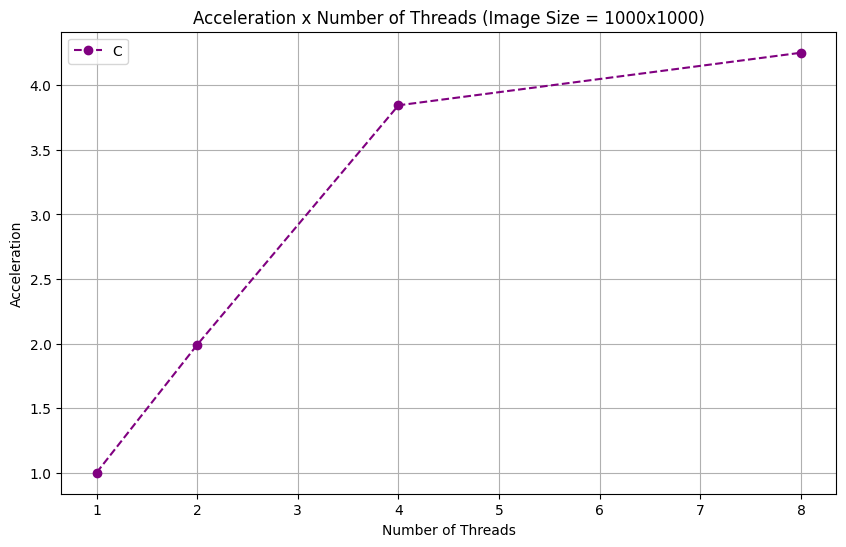

In [173]:
# 1000x1000
plt.figure(figsize=(10, 6))
plt.plot(data_c_1000_ace['Thread Number'], data_c_1000_ace['C'], marker='o', label='C', color='purple', linestyle='dashed')

plt.xlabel('Number of Threads')
plt.ylabel('Acceleration')
plt.title('Acceleration x Number of Threads (Image Size = 1000x1000)')
plt.legend()
plt.grid()
plt.show()

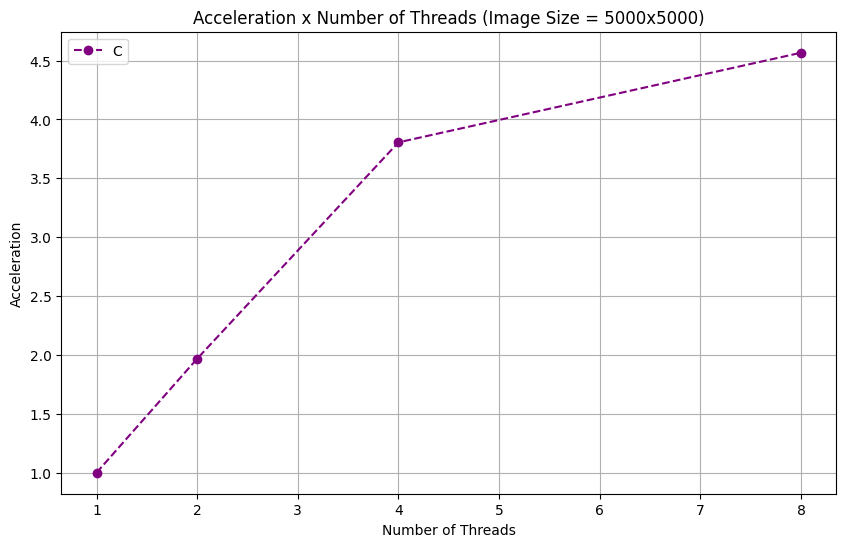

In [174]:
# 5000x5000
plt.figure(figsize=(10, 6))
plt.plot(data_c_5000_ace['Thread Number'], data_c_5000_ace['C'], marker='o', label='C', color='purple', linestyle='dashed')

plt.xlabel('Number of Threads')
plt.ylabel('Acceleration')
plt.title('Acceleration x Number of Threads (Image Size = 5000x5000)')
plt.legend()
plt.grid()
plt.show()

## Comparação C x Python

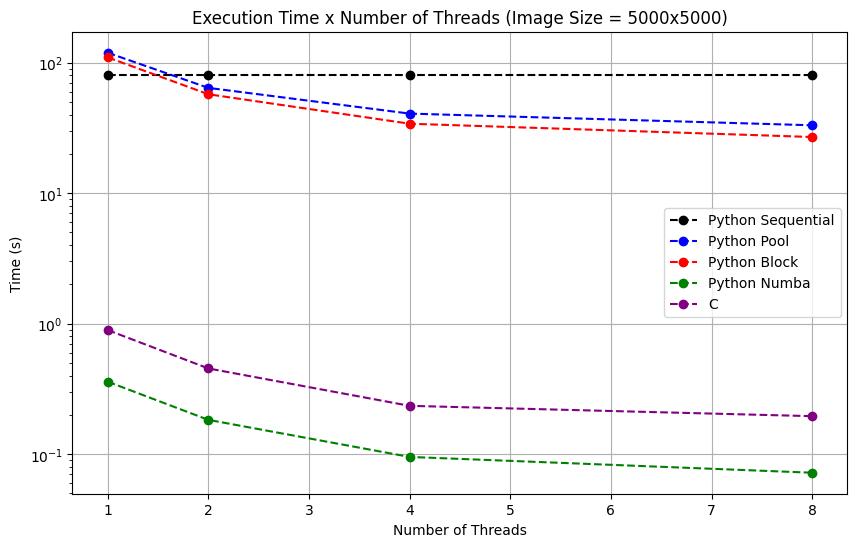

In [177]:
# Comparando Python e C

# 5000x5000
plt.figure(figsize=(10, 6))
plt.plot(data_py_5000_mean['Thread Number'], data_py_5000_mean['Sequential'], marker='o', label='Python Sequential', color='black', linestyle='dashed')
plt.plot(data_py_5000_mean['Thread Number'], data_py_5000_mean['Pool'], marker='o', label='Python Pool', color='blue', linestyle='dashed')
plt.plot(data_py_5000_mean['Thread Number'], data_py_5000_mean['Block'], marker='o', label='Python Block', color='red', linestyle='dashed')
plt.plot(data_py_5000_mean['Thread Number'], data_py_5000_mean['Numba'], marker='o', label='Python Numba', color='green', linestyle='dashed')
plt.plot(data_c_5000_mean['Thread Number'], data_c_5000_mean['C'], marker='o', label='C', color='purple', linestyle='dashed')

plt.yscale('log')
plt.xlabel('Number of Threads')
plt.ylabel('Time (s)')
plt.title('Execution Time x Number of Threads (Image Size = 5000x5000)')
plt.legend()
plt.grid()
plt.show()